In [1]:
import numpy as np

# gera dados de N pessoas em k clusters
def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        #gera um centroide aleatório para cada cluster
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            #gera pontos ao redor do centroide usando uma distribuição normal
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

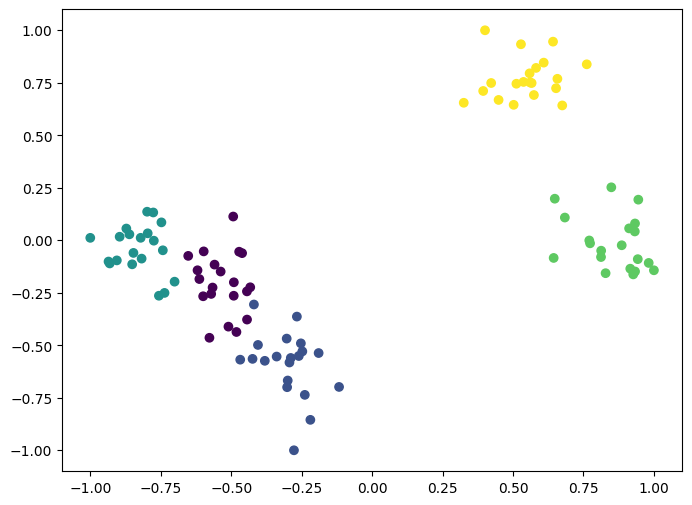

In [3]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusteredData(100, 5) # 100 pessoas em 5 grupos

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(float))
plt.show()

In [4]:
from sklearn import svm, datasets
C = 1.0
# treinar o modelo
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

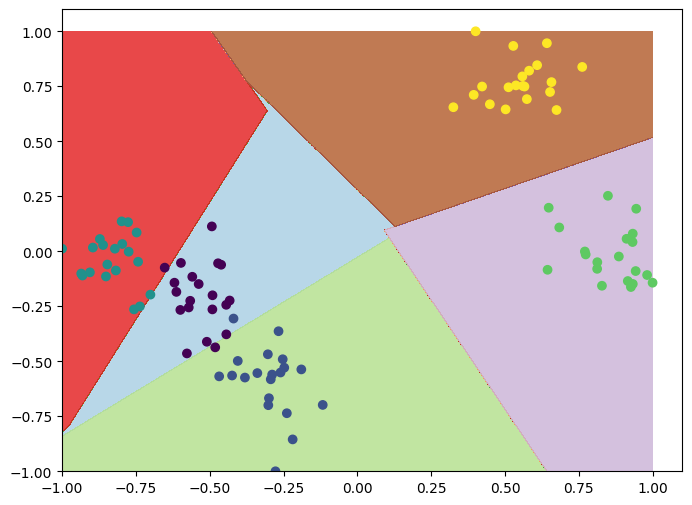

In [5]:
#função para plotar as previsões do modelo
def plotPredictions(clf):
    # grade de pontos 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                         np.arange(-1, 1, .001))
    
    npx = xx.ravel()
    npy = yy.ravel()
    
    # lista de pontos(income, age)
    samplePoints = np.c_[npx, npy]
    
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)  # redimensiona os resultados 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)  
    plt.scatter(X[:, 0], X[:, 1], c=y.astype(float)) 
    plt.show()

plotPredictions(svc)

In [6]:
#previsões para novas amostras
print(svc.predict(scaling.transform([[200000, 40]]))) 

[3]


In [7]:
print(svc.predict(scaling.transform([[50000, 65]])))   

[2]
